In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
#                                                  mark_inset)
import matplotlib.cm as cmx
import matplotlib as mpl
import glob,os 
import pandas as pd
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib
%matplotlib inline

mpl.rc('lines', linewidth=2)
mpl.rc('axes', labelsize=16, titlesize=16)
mpl.rc('figure', titlesize=20)
mpl.rc('font', size=14)  # global font size
mpl.rc('legend', fontsize=14, fancybox=True)
mpl.rc('xtick.major', size=6)
mpl.rc('xtick.minor', size=4)
mpl.rcParams['font.size'] = 14.0



def filter_file(file_path):
    # Define the strings to filter out
    strings_to_remove = ["NCCL INFO", "RCCL version"]

    # Read the file and filter out lines
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    filtered_lines = [line for line in lines if not any(s in line for s in strings_to_remove)]

    # Write filtered lines back to the file
    with open(f"{file_path}.clean", 'w') as file:
        file.writelines(filtered_lines)
    return f"{file_path}.clean"

def read_commlog(sys="Frontier", op="all_reduce", n=1):
    comm = "nccl" if sys == "summit" else "rccl"
    fname = "data/{}/n{}/log.{}.n{}.*".format(comm, n, op, n)
    fname = glob.glob(fname)[0]
    fname = filter_file(fname)
    print(fname)
    
    header = ["size", "count", "type", "redop", "root", "out-time", "out-algbw", "out-busbw",
                   "out-error", "in-time", "in-algbw", "in-busbw", "in-error"]
    raw = pd.read_csv(fname, delim_whitespace=True, header=None, comment="#", names=header)
    '''
    if op == "all_reduce":
        raw.columns = [i for i in header if i != "root"]
    elif op == "all_gather":
        raw.columns = [i for i in header if i != "redop" and i != "root"]
    elif op == "alltoall":
        raw.columns = [i for i in header if i != "redop" and i != "root"]
    elif op == "reduce_scatter":
        raw.columns = [i for i in header if i != "root"]
    '''
    return raw 

print(read_commlog(op="all_reduce", n=8))

data/rccl/n8\log.all_reduce.n8.1668970.clean
          size       count   type redop  root  out-time  out-algbw  out-busbw  \
0      1048576      262144  float   sum    -1     353.1       2.97       5.85   
1      2097152      524288  float   sum    -1     410.2       5.11      10.07   
2      4194304     1048576  float   sum    -1     661.0       6.35      12.49   
3      8388608     2097152  float   sum    -1    1631.7       5.14      10.12   
4     16777216     4194304  float   sum    -1    1751.2       9.58      18.86   
5     33554432     8388608  float   sum    -1    4191.0       8.01      15.76   
6     67108864    16777216  float   sum    -1    6716.2       9.99      19.67   
7    134217728    33554432  float   sum    -1   10073.0      13.32      26.23   
8    268435456    67108864  float   sum    -1   16624.0      16.15      31.79   
9    536870912   134217728  float   sum    -1   31073.0      17.28      34.02   
10  1073741824   268435456  float   sum    -1   61744.0      17.

In [99]:
nodes = [1, 2,4,8,16,32] #,64,128]
#allreduce_64M = [read_commlog(op="all_reduce", n=n)['out-busbw'][6]  for n in nodes]
#print(allreduce_64M)
allgather_64M = [read_commlog(op="all_gather", n=n)['out-algbw'][6]  for n in nodes]
print(allgather_64M)
reducescatter_64M = [read_commlog(op="reduce_scatter", n=n)['out-algbw'][6]  for n in nodes]
print(reducescatter_64M)

allgather_256M = [read_commlog(op="all_gather", n=n)['out-algbw'][8]  for n in nodes]
reducescatter_256M = [read_commlog(op="reduce_scatter", n=n)['out-algbw'][8]  for n in nodes]

allgather_1G = [read_commlog(op="all_gather", n=n)['out-algbw'][10]  for n in nodes]
reducescatter_1G = [read_commlog(op="reduce_scatter", n=n)['out-algbw'][10]  for n in nodes]

print(allgather_1G)
print(reducescatter_1G)


data/rccl/n1\log.all_gather.n1.1668649.clean
data/rccl/n2\log.all_gather.n2.1668900.clean
data/rccl/n4\log.all_gather.n4.1668911.clean
data/rccl/n8\log.all_gather.n8.1668970.clean
data/rccl/n16\log.all_gather.n16.1669121.clean
data/rccl/n32\log.all_gather.n32.1669137.clean
[133.48, 35.04, 28.08, 14.76, 8.66, 4.28]
data/rccl/n1\log.reduce_scatter.n1.1668649.clean
data/rccl/n2\log.reduce_scatter.n2.1668900.clean
data/rccl/n4\log.reduce_scatter.n4.1668911.clean
data/rccl/n8\log.reduce_scatter.n8.1668970.clean
data/rccl/n16\log.reduce_scatter.n16.1669121.clean
data/rccl/n32\log.reduce_scatter.n32.1669137.clean
[139.01, 35.77, 28.18, 14.82, 8.69, 4.43]
data/rccl/n1\log.all_gather.n1.1668649.clean
data/rccl/n2\log.all_gather.n2.1668900.clean
data/rccl/n4\log.all_gather.n4.1668911.clean
data/rccl/n8\log.all_gather.n8.1668970.clean
data/rccl/n16\log.all_gather.n16.1669121.clean
data/rccl/n32\log.all_gather.n32.1669137.clean
data/rccl/n1\log.reduce_scatter.n1.1668649.clean
data/rccl/n2\log.redu

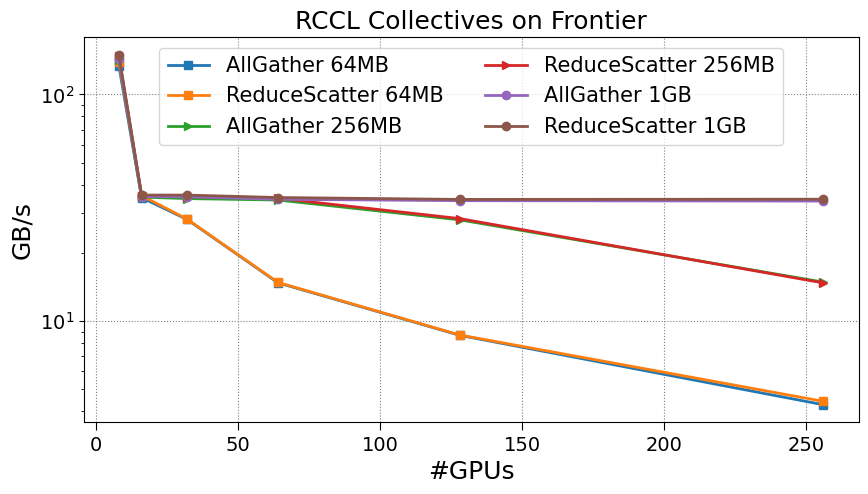

In [84]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

fig, ax = plt.subplots(figsize=(10, 5))

#ax.set_ylim((400,600))
#set_tick_font_size(ax, 22)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

#ax.plot(np.array(nodes)*8, np.array(allreduce_64M), marker='s', label='AllReduce 64M')
ax.plot(np.array(nodes)*8, np.array(allgather_64M), marker='s', label='AllGather 64MB')
ax.plot(np.array(nodes)*8, np.array(reducescatter_64M), marker='s', label='ReduceScatter 64MB')
ax.plot(np.array(nodes)*8, np.array(allgather_256M), marker='>', label='AllGather 256MB')
ax.plot(np.array(nodes)*8, np.array(reducescatter_256M), marker='>', label='ReduceScatter 256MB')
ax.plot(np.array(nodes)*8, np.array(allgather_1G), marker='o', label='AllGather 1GB')
ax.plot(np.array(nodes)*8, np.array(reducescatter_1G), marker='o', label='ReduceScatter 1GB')


#ax.plot(np.array(nodes)*8, np.array(ideal_flash)/1000, linestyle='dotted', color='k', label='ideal')

ax.grid(color='gray', linestyle='dotted')
ax.set_title("RCCL Collectives on Frontier",fontdict=font)
ax.set_ylabel('GB/s', fontdict=font)
ax.set_xlabel('#GPUs', fontdict=font)
ax.set_yscale('log')
#ax.axhline(y=25, color='r', linestyle='--')
#ax.set_ylim((1,60))
#ax.set_yticks([0,5,10,15,20])

ax.legend(fontsize=15, loc='upper center', ncol=2)
plt.savefig('rccl.png', dpi=300, bbox_inches='tight')

In [92]:
from glob import glob
def read_stats(datadir='gpt13b-n1-offload', gpuid=0):
    fname = glob("{}/log.gpu.*".format(datadir))[0]
    print(fname)
    pwr, mem, util = {}, {}, {}

    df = pd.read_csv(fname, header=None)
    pwr = df.iloc[gpuid::8, 0].astype(float).reset_index(drop=True).to_dict()
    mem = df.iloc[gpuid::8, 3].astype(float).reset_index(drop=True).to_dict()
    util = df.iloc[gpuid::8, 1].astype(float).reset_index(drop=True).to_dict()
                
    return pwr, mem, util



def measure(pwr, tmin=1000, tmax=1500):
    ps=[]
    for t,p in pwr.items():
        if t >=tmin and t <=tmax:
            ps.append(p)
    ps = np.array(ps, dtype=float)
    return ps.mean(), ps.std()


print(read_stats("data/rlhf/frontier/n64"))

data/rlhf/frontier/n64\log.gpu.n64.1784237
({0: 95.0, 1: 96.0, 2: 96.0, 3: 96.0, 4: 96.0, 5: 96.0, 6: 96.0, 7: 95.0, 8: 95.0, 9: 96.0, 10: 96.0, 11: 95.0, 12: 94.0, 13: 94.0, 14: 94.0, 15: 95.0, 16: 95.0, 17: 96.0, 18: 96.0, 19: 96.0, 20: 96.0, 21: 96.0, 22: 96.0, 23: 96.0, 24: 96.0, 25: 96.0, 26: 95.0, 27: 94.0, 28: 94.0, 29: 94.0, 30: 94.0, 31: 93.0, 32: 93.0, 33: 93.0, 34: 93.0, 35: 93.0, 36: 93.0, 37: 93.0, 38: 93.0, 39: 93.0, 40: 93.0, 41: 93.0, 42: 95.0, 43: 95.0, 44: 96.0, 45: 95.0, 46: 96.0, 47: 104.0, 48: 115.0, 49: 122.0, 50: 125.0, 51: 127.0, 52: 127.0, 53: 128.0, 54: 129.0, 55: 129.0, 56: 128.0, 57: 128.0, 58: 128.0, 59: 129.0, 60: 129.0, 61: 129.0, 62: 129.0, 63: 128.0, 64: 129.0, 65: 128.0, 66: 128.0, 67: 128.0, 68: 128.0, 69: 129.0, 70: 129.0, 71: 129.0, 72: 129.0, 73: 128.0, 74: 128.0, 75: 128.0, 76: 129.0, 77: 128.0, 78: 128.0, 79: 128.0, 80: 128.0, 81: 128.0, 82: 128.0, 83: 128.0, 84: 128.0, 85: 129.0, 86: 129.0, 87: 129.0, 88: 129.0, 89: 129.0, 90: 129.0, 91: 129.0, 

data/rlhf/frontier/n64\log.gpu.n64.1784237
0.048095150736867855 TFLOPS/W


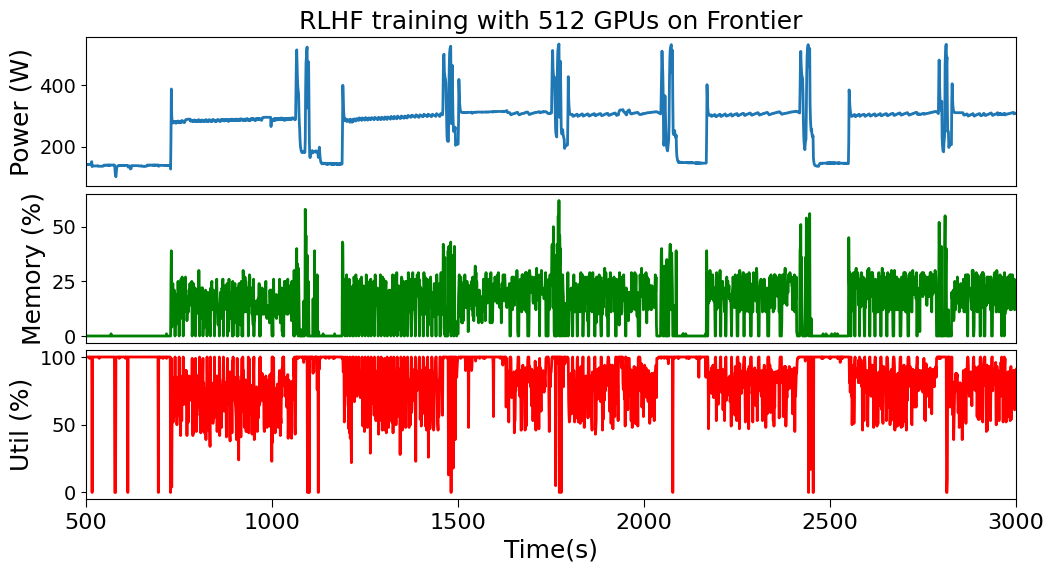

In [94]:
pwr, mem, util = read_stats("data/rlhf/frontier/n64")
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(12,6))
ax1.plot(pwr.keys(), pwr.values())
ax1.set_ylabel("Power (W)", fontdict=font)
ax1.set_xticks([])
ax3.tick_params(axis='x', labelsize=16)

ax2.plot(mem.keys(), mem.values(), color='g')
ax2.set_ylabel("Memory (%)", fontdict=font)
ax2.set_xticks([])
ax3.plot(util.keys(), util.values(), color='r')
ax3.set_ylabel("Util (%)", fontdict=font)
ax3.set_xlabel("Time(s)", fontdict=font)

ax1.set_xlim((500,3000))
ax2.set_xlim((500,3000))
ax3.set_xlim((500,3000))
ax1.set_title("RLHF training with 512 GPUs on Frontier", fontdict=font)
plt.subplots_adjust(hspace=0.05)
ps = measure(pwr, 400, 1400)
print("{} TFLOPS/W".format(11/ps[0]))
plt.savefig('energy.png', dpi=300, bbox_inches='tight')

In [15]:
import re
def extract_flops(line):
    # Use regular expression to find FLOPS per GPU value
    match = re.search(r'([0-9.]+) TFLOPS', line)
    if match:
        return float(match.group(1))
    return None


def get_perf(filename):
    with open(filename, 'r') as file:
        # Initialize a variable to store the extracted FLOPS per GPU value
        flops_per_gpu = None

        # Iterate through each line in the file
        for line in file:
            # Check if the line contains the target string
            if line.startswith("FLOPS per GPU"):
                # Extract FLOPS per GPU from the line
                flops_per_gpu = extract_flops(line)
                break  # Stop processing further    
    return flops_per_gpu


get_perf("data/finetune/baseline/n2/log.flops")

44.1

In [16]:
nodes = [1,2,4,8,16,32]

lora_perf = [ get_perf(f"data/finetune/lora/n{n}/log.flops") for n in nodes]
print(lora_perf)

lora_zero_perf = [ get_perf(f"data/finetune/lora-zero+/n{n}/log.flops") for n in nodes]
print(lora_zero_perf)

[56.67, 46.16, 45.83, 43.84, 34.96, 27.88]
[63.04, 56.5, 54.75, 54.25, 48.71, 44.87]


In [17]:
import re


def get_runtime(filename, ngpus):
    # Initialize variables
    total_micro_batches = None
    last_curr_samples_per_sec = None

    # Open the file
    with open(filename, "r", encoding='utf-8') as file:
        # Read each line
        for line in file:
            # Extract Total Micro Batches
            total_micro_batches_match = re.match(r'^Beginning of Epoch \d+/\d+, Total Micro Batches (\d+)$', line)
            if total_micro_batches_match:
                total_micro_batches = int(total_micro_batches_match.group(1))

            # Extract CurrSamplesPerSec
            curr_samples_per_sec_match = re.match(r'^\[.*\] .* RunningAvgSamplesPerSec=([\d.]+),', line)
            if curr_samples_per_sec_match:
                last_curr_samples_per_sec = float(curr_samples_per_sec_match.group(1))

    # Check if all information is found
    if total_micro_batches is not None and last_curr_samples_per_sec is not None:
        # Calculate runtime
        print(total_micro_batches, last_curr_samples_per_sec)
        # only 1/5 of training sample for 1 epoch, total 10 epoch is needed, batch size =4 
        runtime = ngpus*total_micro_batches * 4 * 5*10 / (last_curr_samples_per_sec * 3600)
        return runtime 
    
    
print(get_runtime("data/finetune/lora/n1/training.log", 1*8))



671 5.734869353412842
52.00157210987712


In [18]:
nodes = [1,2,4,8,16,32]

lora_time = [ get_runtime(f"data/finetune/lora/n{n}/training.log", n*8) for n in nodes]
print(lora_time)

lora_zero_time = [ get_runtime(f"data/finetune/lora-zero+/n{n}/training.log", n*8) for n in nodes]
print(lora_zero_time)

671 5.734869353412842
336 9.602491286146265
168 18.598329012081553
84 35.57617267117671
42 60.4165314671289
21 77.96190585881861
[52.00157210987712, 31.103039593231387, 16.058790360824972, 8.395132029158438, 4.943459338263462, 3.830930803660993]
671 6.492507352135377
336 12.700659368311129
168 22.353024149758003
84 43.732168068186475
42 83.36611598792896
21 131.17045011405494
[45.933289875156994, 23.515839454119767, 13.361353911922475, 6.82945026189853, 3.582590638022674, 2.276935593397529]


Default colors: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


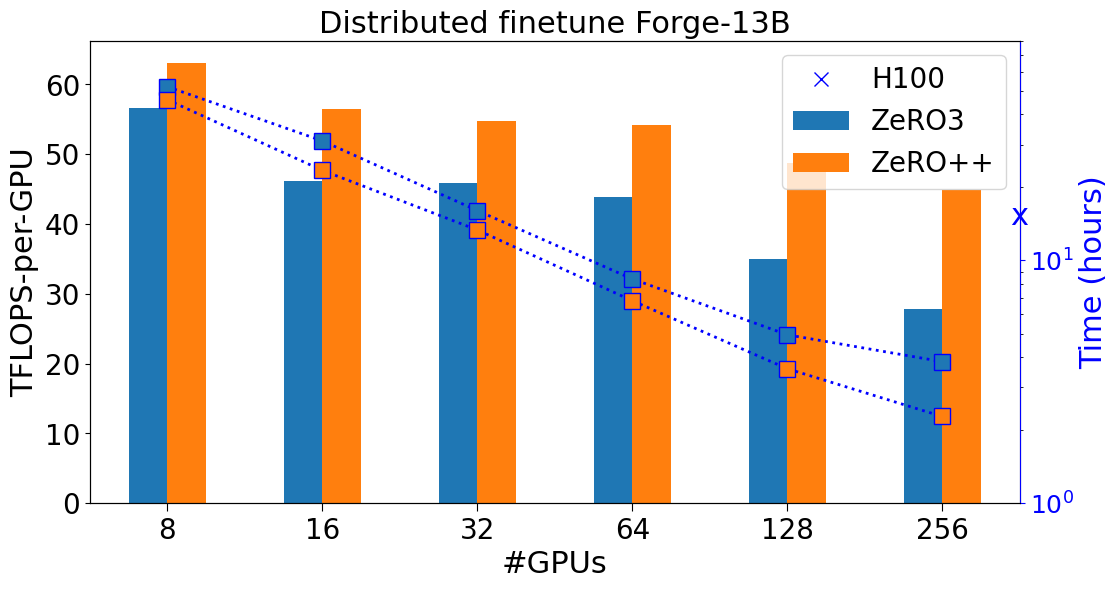

In [54]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
from matplotlib.lines import Line2D
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Print the default colors
print("Default colors:", default_colors)

labels = ['8','16','32', '64', '128', '256']
perf = {"ZeRO3": lora_perf,
          "ZeRO++": lora_zero_perf, 
          "labels": labels 
         }

df = pd.DataFrame(perf, index=labels)


ax = df.plot(kind='bar', figsize=(12,6))
ax.set_xticklabels(df.index, rotation=0)
#ax.set_yticklabels(df.index, rotation=0)

ax.set_title("Distributed finetune Forge-13B", fontdict=font)
ax.set_xlabel("#GPUs", fontdict=font)
ax.set_ylabel('TFLOPS-per-GPU', fontdict=font)
ax.tick_params(axis='x', which='major', labelsize=20, colors='k')
ax.tick_params(axis='y', which='major', labelsize=20, colors='k')

ax.plot([6], [40], marker='x', markersize=10, color='blue', linestyle='None', label='H100')
#legend = ax.get_legend()
#new_entry = Line2D([], [], marker='*', color='blue', linestyle='None', label='H100')
#legend.legendHandles.append(new_entry)
ax.legend(loc='best', fontsize=20)


ax2 = ax.twinx()
ax2.spines['right'].set_color('blue')
x = [0, 1, 2, 3, 4, 5]
ax2.plot(x, lora_time, marker='s', markerfacecolor='#1f77b4', markersize=12, linestyle='dotted', color='b')
ax2.plot(x, lora_zero_time, marker='s', markerfacecolor='#ff7f0e', markersize=12, linestyle='dotted', color='b')

H100 = 12
plt.annotate('x', xy=(0, H100), xytext=(607, H100),
             textcoords='offset points', fontsize=22, color='b', label='H100')

ax2.set_yscale('log')
ax2.set_ylim(1,80)
ax2.set_ylabel("Time (hours)", fontdict=font, color='b')
ax2.tick_params(axis='y', which='major', labelsize=18, colors='b')
plt.savefig('finetune-scaling.png',dpi=300, bbox_inches='tight')

In [20]:


def extract_mem(file_path):
    mem_allocated_values = []
    max_mem_allocated_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            mem_allocated_match = re.search(r'MemAllocated=([\d.]+[KMG]?B)', line)
            max_mem_allocated_match = re.search(r'MaxMemAllocated=([\d.]+[KMG]?B)', line)
            
            if mem_allocated_match:
                mem_allocated_values.append(float(mem_allocated_match.group(1).rstrip('GB')))
            if max_mem_allocated_match:
                max_mem_allocated_values.append(float(max_mem_allocated_match.group(1).rstrip('GB')))
    
    if mem_allocated_values:
        mem_allocated_average = sum(mem_allocated_values) / len(mem_allocated_values)
    else:
        mem_allocated_average = None

    if max_mem_allocated_values:
        max_mem_allocated_average = sum(max_mem_allocated_values) / len(max_mem_allocated_values)
    else:
        max_mem_allocated_average = None
    
    return mem_allocated_average, max_mem_allocated_average


In [21]:
flops_baseline_frontier = get_perf('data/comp/flops/frontier/baseline/log.flops')
flops_lora_frontier = get_perf('data/comp/flops/frontier/lora/log.flops')
memory_baseline_frontier = extract_mem("data/comp/memory/frontier/baseline/training.log")
memory_lora_frontier = extract_mem("data/comp/memory/frontier/lora/training.log")


flops_baseline_h100 = get_perf('data/comp/flops/H100/baseline/log.flops')
flops_lora_h100 = get_perf('data/comp/flops/H100/lora/log.flops')
memory_baseline_h100 = extract_mem("data/comp/memory/H100/baseline/training.log")
memory_lora_h100 = extract_mem("data/comp/memory/H100/lora/training.log")




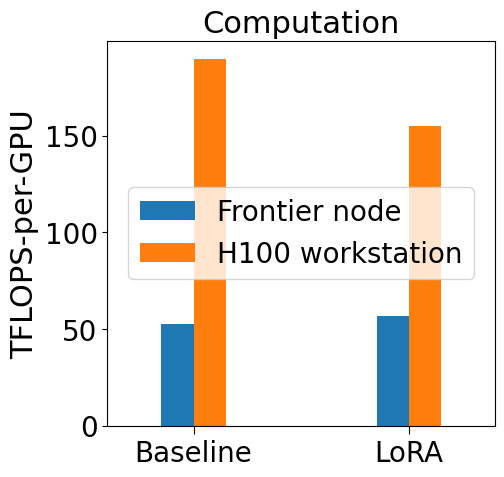

In [25]:
labels = ["Baseline", "LoRA"]

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }

data = {
    "Frontier node" : [flops_baseline_frontier, flops_lora_frontier],
    "H100 workstation" : [flops_baseline_h100, flops_lora_h100],
    "labels" : labels
}

df = pd.DataFrame(data, index=labels)


ax = df.plot(kind='bar', figsize=(5,5), width=0.3)
ax.set_xticklabels(df.index, rotation=0)
#ax.set_yticklabels(df.index, rotation=0)
ax.tick_params(axis='x', which='major', labelsize=20, colors='k')
ax.tick_params(axis='y', which='major', labelsize=20, colors='k')

ax.set_title("Computation", fontdict=font)
ax.set_ylabel("TFLOPS-per-GPU", fontdict=font)
#ax.set_yscale('log')

ax.legend(loc='center', fontsize=20)

#plt.axhline(y=1.3e10, color='r', linestyle='--')
plt.savefig('flops.png', dpi=300, bbox_inches='tight')

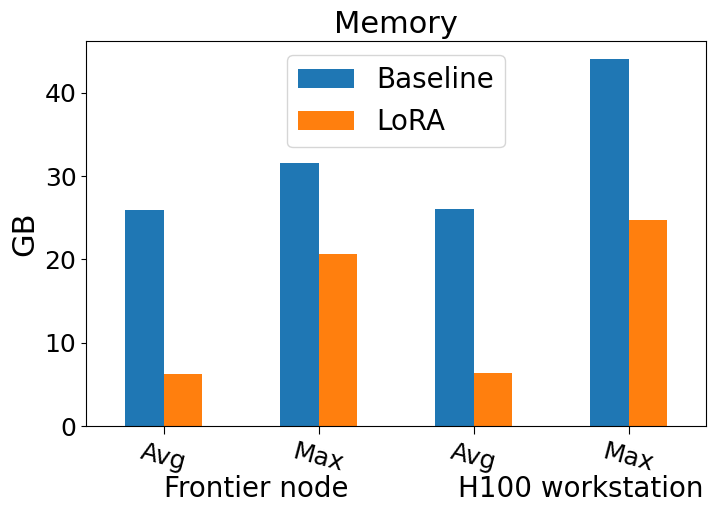

In [26]:
labels = ["Avg", "Max", "Avg", "Max",]

data = {
    "Baseline" : [memory_baseline_frontier[0], memory_baseline_frontier[1], 
                  memory_baseline_h100[0], memory_baseline_h100[1]],
    "LoRA" : [memory_lora_frontier[0], memory_lora_frontier[1], memory_lora_h100[0], memory_lora_h100[1]],
    "labels" : labels
}

df = pd.DataFrame(data, index=labels)


ax = df.plot(kind='bar', figsize=(8,5))
ax.set_xticklabels(df.index, rotation=-15)
#ax.set_yticklabels(df.index, rotation=0)
ax.tick_params(axis='x', which='major', labelsize=18, colors='k')
ax.tick_params(axis='y', which='major', labelsize=18, colors='k')

ax.set_title("Memory", fontdict=font)
ax.set_ylabel("GB", fontdict=font)
#ax.set_yscale('log')
ax.text(0, -8.5, "Frontier node", fontsize=20)
ax.text(1.9, -8.5, "H100 workstation", fontsize=20)

ax.legend(loc='upper center', fontsize=20)

#plt.axhline(y=1.3e10, color='r', linestyle='--')
plt.savefig('memory.png', dpi=300, bbox_inches='tight')

[0.36912, 0.7430399999999999, 1.4838399999999998, 2.9638400000000003, 5.20704, 10.78016, 21.76] [1.16952]
[0.36912, 0.73824, 1.47648, 2.95296, 5.90592, 11.81184, 23.62368]
Default Color Cycle: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
0.9211096662332033


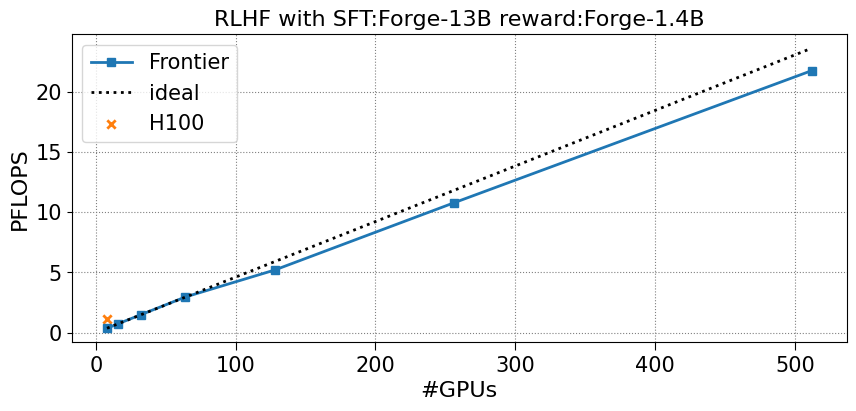

In [72]:
nodes = [1,2,4,8,16,32,64]

rlhf_frontier = [ get_perf(f"data/rlhf/frontier/n{n}/log.flops")*n*8/1000. for n in nodes]
rlhf_h100 = [get_perf(f"data/rlhf/h100/log.flops")*8/1000.]
print(rlhf_frontier, rlhf_h100)
ideal = [rlhf_frontier[0]*n/nodes[0]  for n in nodes]
print(ideal)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(10, 4))
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

#ax.set_yscale("log")
ax.plot(np.array(nodes)*8, rlhf_frontier, marker='s', label="Frontier")
ax.plot(np.array(nodes)*8, ideal, linestyle='dotted', color='k', label='ideal')
ax.scatter(8, rlhf_h100,  marker='x', label='H100', color='#ff7f0e')
#ax.plot(lr0_015['Step'], lr0_015['Value'], label='lr=0.015')
ax.grid(color='gray', linestyle='dotted')
ax.set_title("RLHF with SFT:Forge-13B reward:Forge-1.4B",fontdict=font)
ax.set_ylabel('PFLOPS', fontdict=font)
ax.set_xlabel('#GPUs', fontdict=font)
#ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())

ax.legend(fontsize=15)
plt.savefig('rlhf.png', dpi=300, bbox_inches='tight')


# Get the default color cycle
default_color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Print the default color cycle
print("Default Color Cycle:", default_color_cycle)

print(rlhf_frontier[-1]/ideal[-1])


[247.28302001953125, 1.1641782522201538, 1.1702594757080078, 1.1955442428588867, 1.224538803100586, 1.2426862716674805, 1.2561135292053223, 1.2668113708496094, 1.277859091758728, 1.2852243185043335, 1.286338210105896]


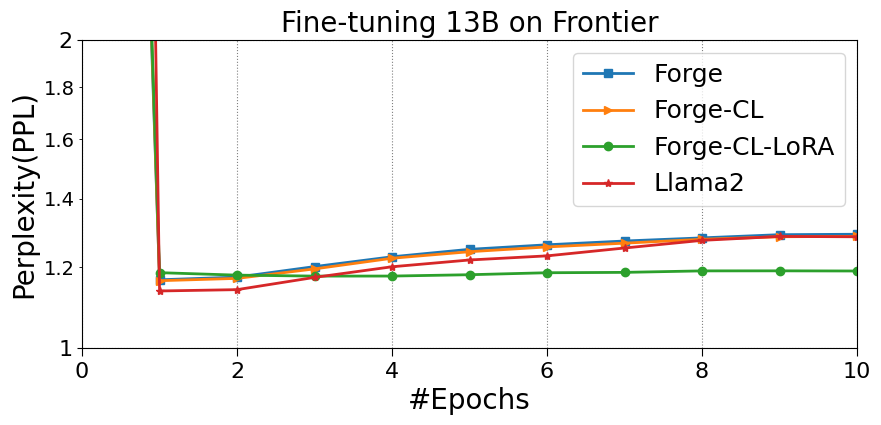

In [79]:

import re

def read_ppls(file_path):
    pattern = r"ppl:\s*([\d.]+)"  
    ppl_numbers = []
    with open(file_path, "r") as file:
        for line in file:
            matches = re.findall(pattern, line)
            if matches:
                ppl_numbers.extend(map(float,matches))
    
    return ppl_numbers


print(read_ppls("data/ppl/cl/training.log"))


ppl_baseline = read_ppls("data/ppl/baseline/training.log")
ppl_cl = read_ppls("data/ppl/cl/training.log")
ppl_lora = read_ppls("data/ppl/lora/training.log")
ppl_llama2 = read_ppls("data/ppl/llama2/training.log")

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

fig, ax = plt.subplots(figsize=(10, 4))
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

ax.set_ylim((1,2))
ax.set_xlim((0,10))
ax.set_yscale("log")
ax.plot(range(len(ppl_baseline)), ppl_baseline, marker='s', label="Forge")
ax.plot(range(len(ppl_cl)), ppl_cl, marker='>', label="Forge-CL")
ax.plot(range(len(ppl_lora)), ppl_lora, marker='o', label="Forge-CL-LoRA")
ax.plot(range(len(ppl_llama2)), ppl_llama2, marker='*', label="Llama2")
#ax.plot(lr0_015['Step'], lr0_015['Value'], label='lr=0.015')
ax.grid(color='gray', linestyle='dotted')
ax.set_title("Fine-tuning 13B on Frontier",fontdict=font)
ax.set_ylabel('Perplexity(PPL)', fontdict=font)
ax.set_xlabel('#Epochs', fontdict=font)
ax.set_yscale('log')
ax.set_yticks([1,2])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())

ax.legend(fontsize=18)
plt.savefig('ppl.png', dpi=300, bbox_inches='tight')

C:\Users\yzn\AppData\Local\Temp\ipykernel_18028\2496474368.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name)


256


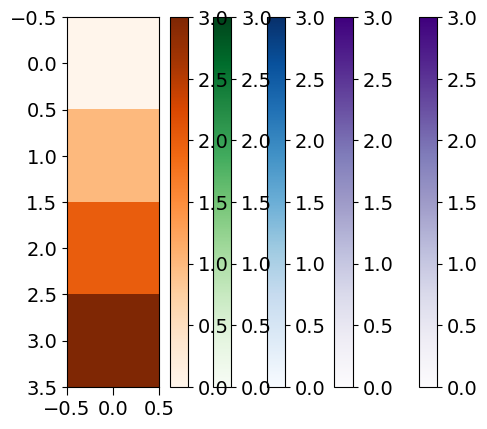

In [9]:

def get_colors(cmap_name):
    # Choose a colormap, for example 'viridis'
    cmap = plt.cm.get_cmap(cmap_name)

    # Display colormap
    plt.imshow([[i] for i in range(4)], cmap=cmap)
    plt.colorbar()

    # Get the colors and their hexadecimal representations
    colors = [cmap(i) for i in range(cmap.N)]
    hex_colors = [matplotlib.colors.rgb2hex(c) for c in colors]
    return hex_colors 
    #print("Hexadecimal color codes for 'viridis' colormap:")
    #for hex_code in hex_colors:
    #    print(hex_code)
    
print(len(get_colors("Purples")))

c = get_colors("Purples")
c1 = c[250], c[200], c[150], c[100]

c = get_colors("Blues")
c2 = c[250], c[200], c[100]

c = get_colors("Greens")
c3 = c[250], c[200], c[100]

c = get_colors("Oranges")
c4 = c[0], c[50], c[100], c[150]

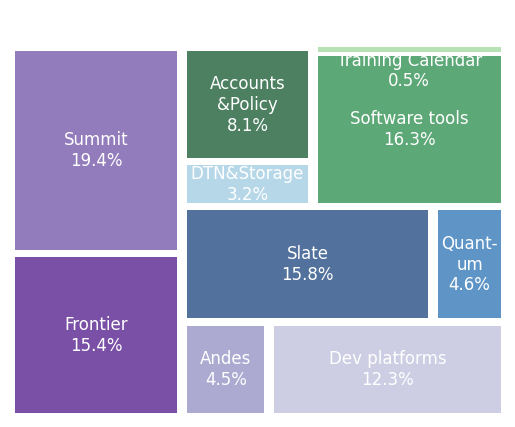

In [10]:
import squarify

# Sample data
sizes = [15.4,19.4,4.5, 12.3,
         15.8,4.6,  3.2,
        8.1, 16.3, 0.5
        ]
labels = ['Frontier\n15.4%', 'Summit\n19.4%', 'Andes\n4.5%', 'Dev platforms\n12.3%',  #platforms
         'Slate\n15.8%','Quant-\num\n4.6%',  'DTN&Storage\n3.2%',#auxilary system
         'Accounts\n&Policy\n8.1%', 'Software tools\n16.3%','\n\nTraining Calendar\n0.5%' #assis
         ]
colors = c1+c2+c3

# Create the treemap
fig, ax = plt.subplots()
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, ax=ax, pad=0.1, text_kwargs={'color':'white','fontsize': 12})

# Add labels for each rectangle
#for i, (size, label) in enumerate(zip(sizes, labels)):
#    x, y, dx, dy = squarify.plot(sizes=[size], ax=ax)[0].get_bbox().bounds
#    ax.text(x + dx / 2, y + dy / 2, label, ha='center', va='center')

# Add labels
ax.axis('off')

plt.savefig('doc.png', dpi=300, bbox_inches='tight')

In [42]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


2 3154
[4177920      80      80 ... 1638400 1689920 4211200]


Text(0.5, 1.0, 'Training Forge-m with LoRAper step per device')

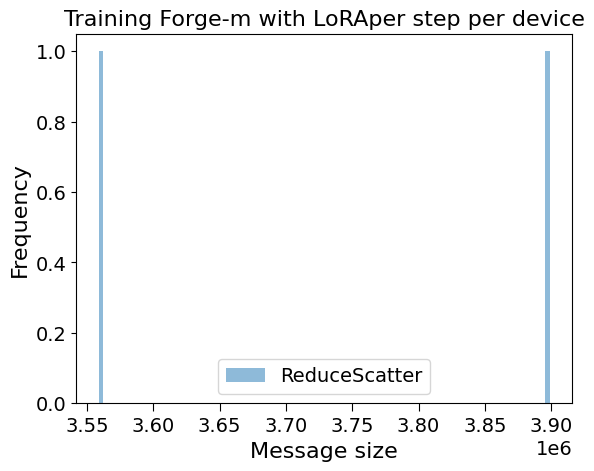

In [83]:
rs_lora = pd.read_csv("data/msg/n16/g1-lora/msg.rs", header=None).values.squeeze()
ag_lora = pd.read_csv("data/msg/n16/g1-lora/msg.ag", header=None).values.squeeze()
print(len(rs_lora), len(ag_lora))
print(ag_lora)
data = {
    "ReduceScatter": np.concatenate([rs_lora, [np.nan] * (len(ag_lora) - len(rs_lora))]), 
    #"Allgather": ag_lora
}

df = pd.DataFrame(data)
ax = df.plot.hist(bins=100, alpha=0.5)
ax.set_xlabel('Message size')
ax.set_title('Training Forge-m with LoRAper step per device')

2 3154
[ 4177920       80       80 ... 26214400 27038720 67379200]


Text(0.5, 1.0, 'Training Forge-m with LoRA hpZ per step per device')

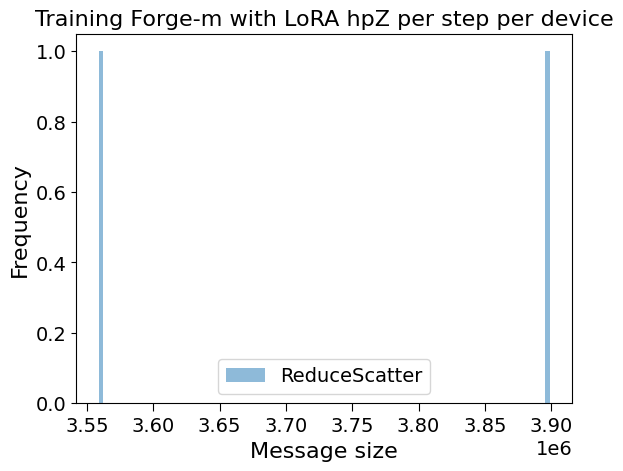

In [82]:
rs_lora_hpz = pd.read_csv("data/msg/n16/g1-lora-hpZ/msg.rs", header=None).values.squeeze()
ag_lora_hpz = pd.read_csv("data/msg/n16/g1-lora-hpZ/msg.ag", header=None).values.squeeze()
print(len(rs_lora_hpz), len(ag_lora_hpz))
print(ag_lora_hpz)
data = {
    "ReduceScatter": np.concatenate([rs_lora_hpz, [np.nan] * (len(ag_lora_hpz) - len(rs_lora_hpz))]), 
    #"Allgather": ag_lora_hpz
}

df = pd.DataFrame(data)
ax = df.plot.hist(bins=100, alpha=0.5)
ax.set_xlabel('Message size')
ax.set_title('Training Forge-m with LoRA hpZ per step per device')

2 5176
[ 4177920       80       80 ...    21124 33689600    17920]


Text(0.5, 1.0, 'Training Forge-m with LoRA qwZ hpZ per step per device')

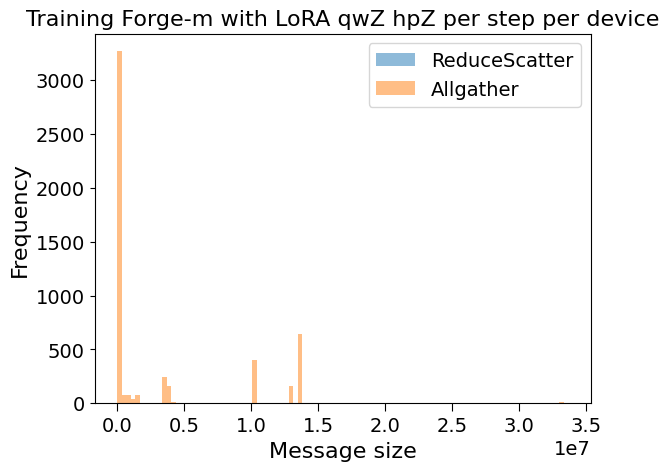

In [7]:
rs_lora_qwz_hpz = pd.read_csv("data/msg/n16/g1-lora-qwZ-hpZ/msg.rs", header=None).values.squeeze()
ag_lora_qwz_hpz = pd.read_csv("data/msg/n16/g1-lora-qwZ-hpZ/msg.ag", header=None).values.squeeze()
print(len(rs_lora_qwz_hpz), len(ag_lora_qwz_hpz))
print(ag_lora_qwz_hpz)
data = {
    "ReduceScatter": np.concatenate([rs_lora_qwz_hpz, [np.nan] * (len(ag_lora_qwz_hpz) - len(rs_lora_qwz_hpz))]), 
    "Allgather": ag_lora_qwz_hpz
}

df = pd.DataFrame(data)
ax = df.plot.hist(bins=100, alpha=0.5)
ax.set_xlabel('Message size')
ax.set_title('Training Forge-m with LoRA qwZ hpZ per step per device')

322 5736
[ 4177920       80       80 ...     8192 33280000    16640]


Text(0.5, 1.0, 'Training Forge-m with LoRA qwZ hpZ qgZ per step per device')

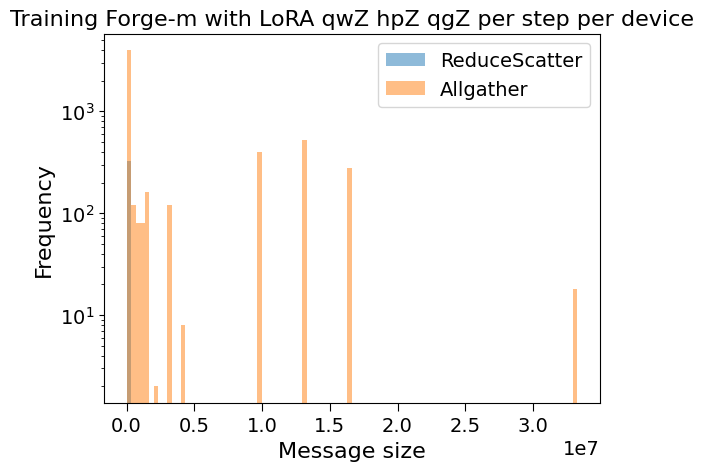

In [12]:
rs_lora_qwz_hpz_qgz = pd.read_csv("data/msg/n16/g1-lora-qwZ-hpZ-qgZ/msg.rs", header=None).values.squeeze()
ag_lora_qwz_hpz_qgz = pd.read_csv("data/msg/n16/g1-lora-qwZ-hpZ-qgZ/msg.ag", header=None).values.squeeze()
print(len(rs_lora_qwz_hpz_qgz), len(ag_lora_qwz_hpz_qgz))
print(ag_lora_qwz_hpz_qgz)
data = {
    "ReduceScatter": np.concatenate([rs_lora_qwz_hpz_qgz, [np.nan] * (len(ag_lora_qwz_hpz_qgz) - len(rs_lora_qwz_hpz_qgz))]), 
    "Allgather": ag_lora_qwz_hpz_qgz
}

df = pd.DataFrame(data)
ax = df.plot.hist(bins=100, alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel('Message size')
ax.set_title('Training Forge-m with LoRA qwZ hpZ qgZ per step per device')

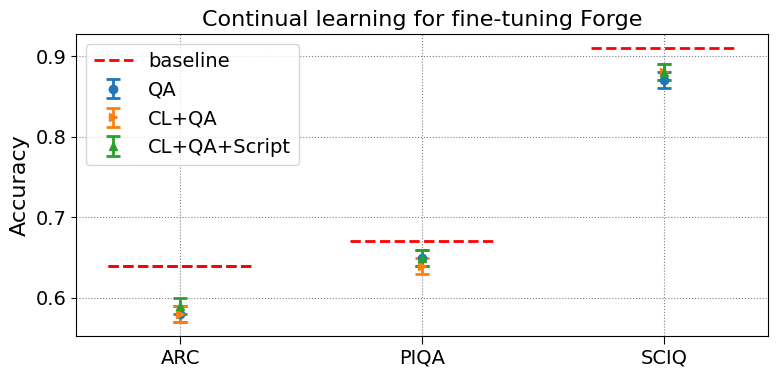

In [31]:

tests = ['ARC', 'PIQA', 'SCIQ']
x = np.arange(len(tests))
forge_means = [0.58, 0.65, 0.87] 
forge_errors = [0.01, 0.01, 0.01]  

forge_cl_means = [0.58, 0.64, 0.88] 
forge_cl_errors = [0.01, 0.01, 0.01]  

forge_cl_2tasks_means = [0.59, 0.65, 0.88] 
forge_cl_2tasks_errors = [0.01, 0.01, 0.01]  

baseline = [0.64, 0.67, 0.91]

plt.figure(figsize=(8, 4))

plt.errorbar(x, forge_means, yerr=forge_errors, fmt='o', capsize=5, capthick=2, label='QA')
plt.errorbar(x, forge_cl_means, yerr=forge_cl_errors, fmt='>', capsize=5, capthick=2, label='CL+QA')
plt.errorbar(x, forge_cl_2tasks_means, yerr=forge_cl_2tasks_errors, fmt='^', capsize=5, capthick=2, label='CL+QA+Script')

for i, test in enumerate(tests):
    if i == 0:
        plt.hlines(baseline[i], i-0.3, i+0.3, linestyle='--', color='red', label='baseline')
    plt.hlines(baseline[i], i-0.3, i+0.3, linestyle='--', color='red')

# Customizing the plot
plt.xticks(x, tests)
#plt.xlabel('Categories')
plt.ylabel('Accuracy')
plt.title('Continual learning for fine-tuning Forge')
plt.legend()
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.savefig('cl.png', dpi=300, bbox_inches='tight')